In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('bank.xlsx', sheet_name = 'Data')

In [3]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [4]:
# very imbalanced data to "no" target variable
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [5]:
df['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [6]:
df['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [7]:
df['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [8]:
print("The mean age contained within the dataset is " + str(df['age'].mean()))

The mean age contained within the dataset is 41.17009511170095


In [9]:
# check for nulls
df.isnull().values.any()

False

### Let's change some of our categorical variables to numeric

In [10]:
## need to change months from categorical to numeric
df['month'].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [11]:
replacements_month = { 
  r'jan': 1,
  r'feb': 2,
  r'mar': 3,
  r'apr': 4,
  r'may': 5,
  r'jun': 6,
  r'jul': 7,
  r'aug': 8,
  r'sep': 9,
  r'oct': 10,
  r'nov': 11,
  r'dec': 12, 
}

df['month'] = df.month.replace(replacements_month, regex=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,10,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,5,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,4,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,6,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,5,226,1,-1,0,unknown,no


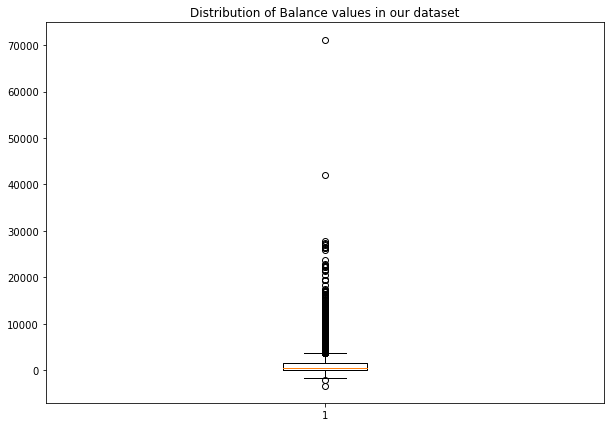

In [12]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize = (10, 7))
 
# Creating plot
plt.boxplot(df['balance'])
plt.title('Distribution of Balance values in our dataset')
 
# show plot
plt.show()
#fig.savefig("balances-dist.png", bbox_inches = 'tight', facecolor = 'w', transparent = False)

In [13]:
## boxplot suggests values less than 1, lets check this quickly
## if credit exists this would be possible -> assumption
df['balance'].min()

-3313

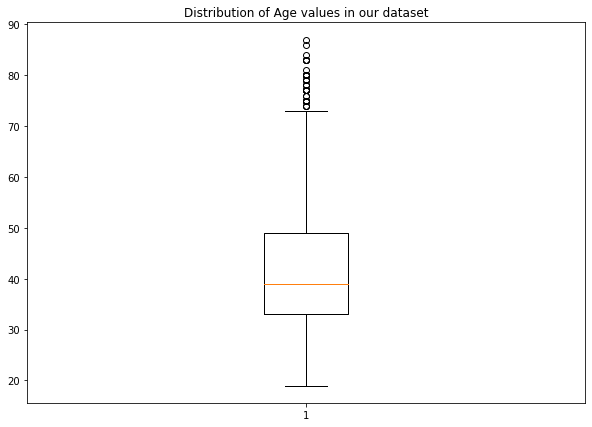

In [14]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize = (10, 7))
 
# Creating plot
plt.boxplot(df['age'])
plt.title('Distribution of Age values in our dataset')
 
# show plot
plt.show()

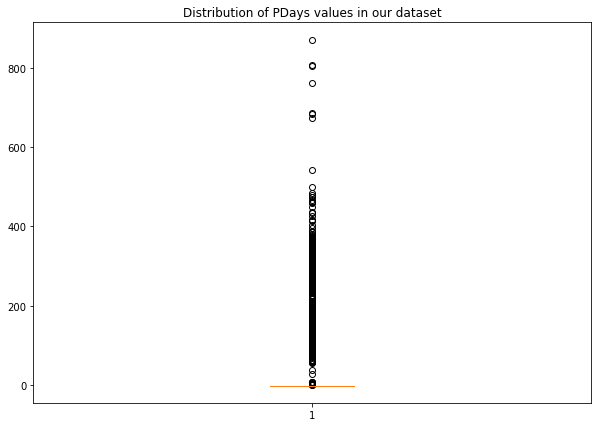

In [15]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize = (10, 7))
 
# Creating plot
plt.boxplot(df['pdays'])
plt.title('Distribution of PDays values in our dataset')
 
# show plot
plt.show()
fig.savefig("pdays-dist.png", bbox_inches = 'tight', facecolor = 'w', transparent = False)

In [16]:
outliers = []
def detect_outlier(data_1):
    
    threshold = 3
    mean_1 = np.mean(data_1)
    std_1 = np.std(data_1)
    for y in data_1:
        z_score = (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return sorted(outliers)

In [17]:
outliers = []
outlier_datapoints = detect_outlier(df['balance'])
print("Outliers in Balance column are the following: " + "\n" + str(outlier_datapoints))

Outliers in Balance column are the following: 
[10655, 10758, 10786, 10787, 10788, 10888, 10907, 10910, 10924, 11084, 11219, 11262, 11269, 11303, 11386, 11417, 11494, 11555, 11797, 11971, 12186, 12223, 12437, 12519, 12531, 12569, 12607, 12877, 13044, 13117, 13156, 13204, 13229, 13342, 13494, 13658, 13669, 13683, 13711, 13893, 14058, 14093, 14220, 14363, 14412, 14440, 14533, 14752, 15030, 15311, 15459, 15520, 15834, 16063, 16178, 16264, 16353, 16430, 16873, 16874, 16957, 16992, 17361, 17555, 18347, 19317, 19358, 19447, 20453, 21244, 21515, 21664, 22171, 22196, 22370, 22546, 22856, 23663, 25824, 26306, 26394, 26452, 26965, 27069, 27359, 27733, 42045, 71188]


In [18]:
lstvals = list(df['balance'])
rm = []
for i in range(len(lstvals)):
    if lstvals[i] in outliers:
        rm.append('outlier')
    else:
        rm.append('ok')
df['outlierbalance'] = rm

In [19]:
df['outlierbalance'].value_counts()

ok         4433
outlier      88
Name: outlierbalance, dtype: int64

In [20]:
df.shape

(4521, 18)

In [21]:
df.drop(df[df['outlierbalance'] != 'ok'].index, inplace = True)
df.shape

(4433, 18)

In [22]:
df.drop(columns = ['outlierbalance'], inplace = True)

In [23]:
outliers = []
outlier_datapoints1 = detect_outlier(df['age'])
print("Outliers in Age column are the following: " + "\n" + str(outlier_datapoints1))

Outliers in Age column are the following: 
[73, 73, 73, 73, 73, 73, 74, 74, 74, 75, 75, 75, 75, 75, 76, 76, 77, 77, 77, 77, 77, 77, 78, 78, 78, 79, 79, 79, 79, 80, 80, 80, 80, 80, 80, 81, 83, 83, 83, 83, 84, 86, 87]


In [24]:
outliers = []
outlier_datapoints2 = detect_outlier(df['pdays'])
print("Outliers in PDays column are the following: " + "\n" + str(outlier_datapoints2))

Outliers in PDays column are the following: 
[341, 342, 342, 342, 342, 342, 342, 343, 343, 343, 344, 344, 344, 344, 345, 345, 345, 345, 345, 345, 346, 346, 346, 347, 347, 347, 347, 348, 349, 349, 349, 349, 349, 349, 349, 349, 350, 350, 350, 350, 350, 351, 351, 351, 351, 351, 351, 352, 352, 352, 353, 353, 353, 355, 355, 356, 356, 356, 356, 356, 357, 357, 357, 357, 357, 358, 358, 358, 358, 359, 359, 360, 360, 360, 360, 360, 361, 361, 362, 362, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 364, 364, 364, 364, 364, 364, 364, 364, 364, 365, 365, 365, 366, 366, 366, 367, 367, 367, 367, 367, 368, 368, 368, 368, 368, 368, 369, 369, 370, 370, 370, 370, 370, 370, 370, 370, 370, 371, 371, 371, 371, 371, 373, 373, 374, 375, 378, 382, 385, 386, 397, 404, 414, 415, 415, 426, 435, 436, 450, 460, 461, 461, 462, 467, 474, 474, 479, 484, 500, 541, 674, 683, 687, 761, 804, 808, 871]


In [25]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,10,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,5,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,4,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,6,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,5,226,1,-1,0,unknown,no


### Binary Columns

In [26]:
# check values in binary columns to 0 for no, 1 for yes
# these columns are: default, housing, loan and y
replacements_binary = { 
  r'no': 0,
  r'yes': 1,
}

df['default'] = df.default.replace(replacements_binary, regex=True)
df['housing'] = df.housing.replace(replacements_binary, regex=True)
df['loan'] = df.loan.replace(replacements_binary, regex=True)
df['y'] = df.y.replace(replacements_binary, regex=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,10,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,5,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,4,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,6,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,5,226,1,-1,0,unknown,0


In [27]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,10,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,5,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,4,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,6,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,5,226,1,-1,0,unknown,0


In [28]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis = 1)
    return(res)

In [29]:
df = encode_and_bind(df, 'education')
df = encode_and_bind(df, 'job')
df = encode_and_bind(df, 'marital')
df = encode_and_bind(df, 'poutcome')
df = encode_and_bind(df, 'contact')

In [30]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,...,0,1,0,0,0,0,1,1,0,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,...,0,1,0,1,0,0,0,1,0,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,...,0,0,1,1,0,0,0,1,0,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,...,0,1,0,0,0,0,1,0,0,1
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,...,0,1,0,0,0,0,1,0,0,1


In [31]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown'],
      dtype='object')

In [32]:
df.drop(columns = ['marital', 'job', 'education', 'poutcome', 'contact'], inplace = True)

In [33]:
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,30,0,1787,0,0,19,10,79,1,-1,...,0,1,0,0,0,0,1,1,0,0
1,33,0,4789,1,1,11,5,220,1,339,...,0,1,0,1,0,0,0,1,0,0
2,35,0,1350,1,0,16,4,185,1,330,...,0,0,1,1,0,0,0,1,0,0
3,30,0,1476,1,1,3,6,199,4,-1,...,0,1,0,0,0,0,1,0,0,1
4,59,0,0,1,0,5,5,226,1,-1,...,0,1,0,0,0,0,1,0,0,1


### Correlations with target variable

<AxesSubplot:>

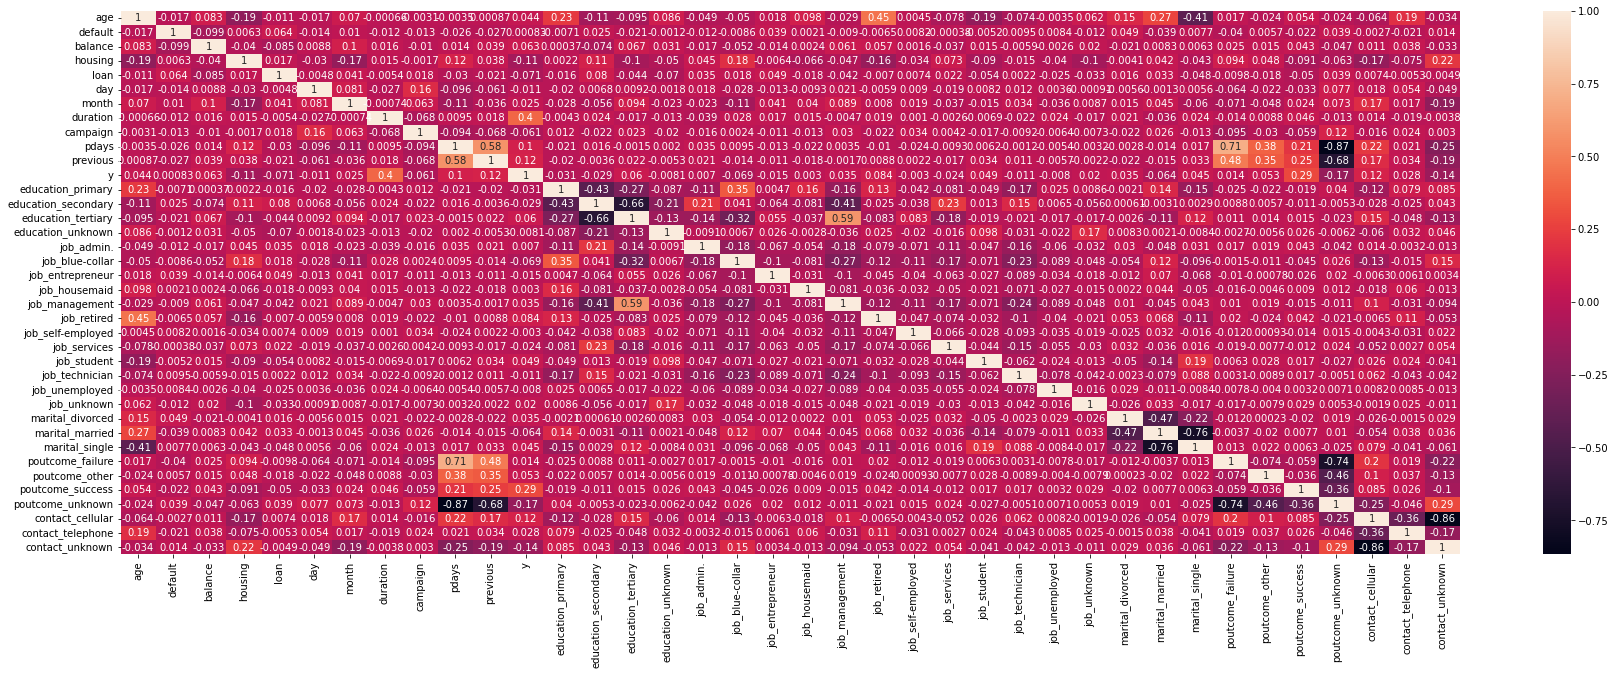

In [34]:
## check correlations
import seaborn as sns

corr = df.corr()

plt.figure(figsize = (30, 10))
sns.heatmap(corr, annot = True)
#plt.savefig("corrs.png", bbox_inches = 'tight', facecolor = 'w', transparent = False)

In [35]:
## convert to excel sheet
#df.to_excel("clean-data.xlsx",
#             sheet_name = 'CleanData') 